In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# 1. 데이터 로딩
data = pd.read_csv('/content/drive/MyDrive/drive/Social_Network_Ads.csv')

# 2. 데이터 전처리(preprocessing), Feature 추출
X_data = data[["Age", "EstimatedSalary"]].values
y = data["Purchased"].values.reshape(-1, 1)

X_mean = np.mean(X_data, axis=0)
X_std = np.std(X_data, axis=0)
X_norm = (X_data - X_mean) / X_std

X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

# 3. 학습 데이터를 데이터의 80%(320개), 테스트 데이터를 20%(80개)로 분할 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

# 4. 학습데이터에 대해 로지스틱회귀 모델 구성

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 예측 함수 정의
def h(X, w):
    return sigmoid(X @ w)

# 비용 함수 정의
def compute_cost(X, y, w):
    m = len(y)
    h_val = h(X, w)
    cost = -1/m * np.sum(y * np.log(h_val) + (1 - y) * np.log(1 - h_val))
    return cost

# 5. 경사하강법을 이용해서 모델 학습하고, 파라미터 값 출력 print(w0, w1, w2)
w = np.zeros([3, 1])
alpha = 0.01
for i in range(10000):
    grad = -X_train.T @ (y_train - h(X_train, w)) / len(y_train)
    w -= alpha * grad

print(w)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[-1.03975507]
 [ 2.35919931]
 [ 1.32949847]]


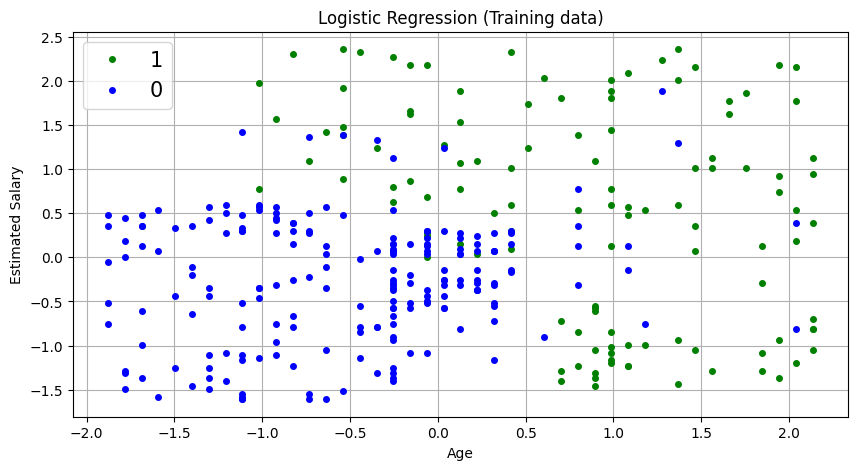

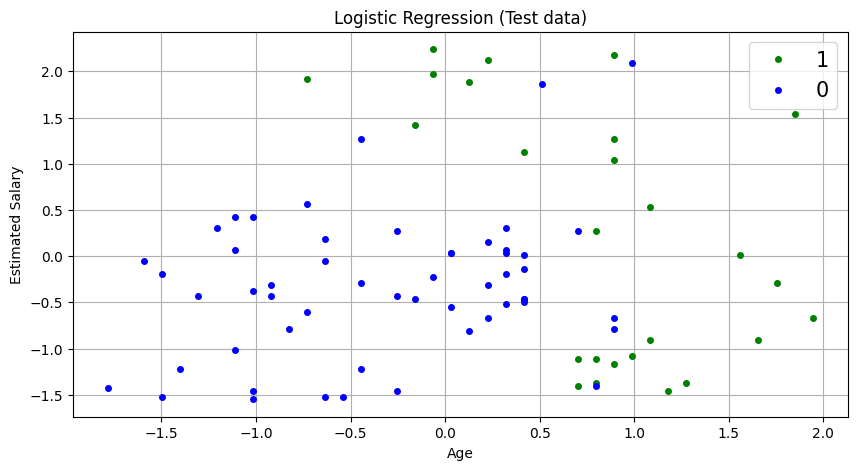

In [85]:
# 6. 모델의 시각화

X_train_plot = X_train[:, 1:]
X_test_plot = X_test[:, 1:]

X2 = X_train_plot[y_train.ravel() == 1]
X1 = X_train_plot[y_train.ravel() == 0]
X2_test = X_test_plot[y_test.ravel() == 1]
X1_test = X_test_plot[y_test.ravel() == 0]

# 학습데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(X2[:, 0], X2[:, 1], 'go', markersize=4, label='1')
plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize=4, label='0')
plt.title("Logistic Regression (Training data)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(fontsize=15)
plt.grid()
plt.show()

# 테스트테이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(X2_test[:, 0], X2_test[:, 1], 'go', markersize=4, label='1')
plt.plot(X1_test[:, 0], X1_test[:, 1], 'bo', markersize=4, label='0')
plt.title("Logistic Regression (Test data)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(fontsize=15)
plt.grid()
plt.show()

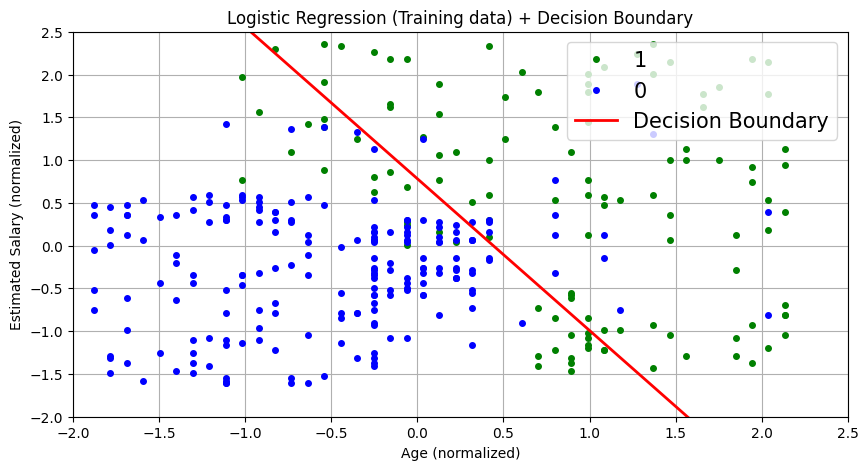

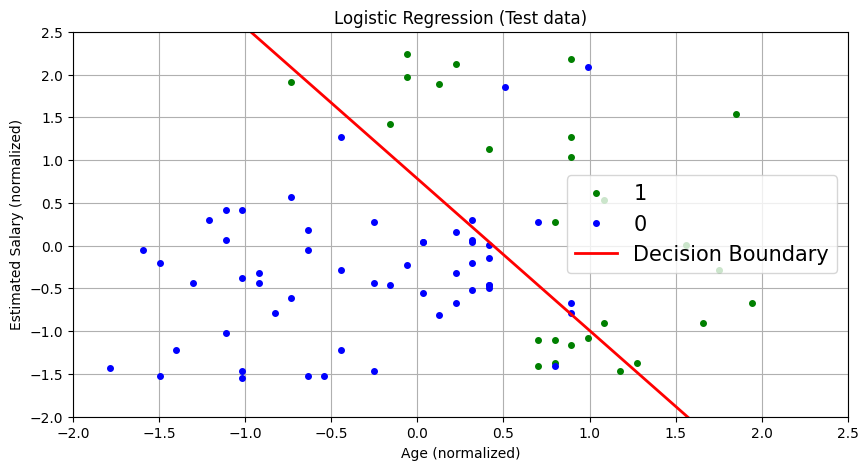

In [89]:
# 6-1. 모델의 시각화 + 경계선

X_train_plot = X_train[:, 1:]
X_test_plot = X_test[:, 1:]

X2 = X_train_plot[y_train.ravel() == 1]
X1 = X_train_plot[y_train.ravel() == 0]
X2_test = X_test_plot[y_test.ravel() == 1]
X1_test = X_test_plot[y_test.ravel() == 0]

# 경계선 x, y 계산
xp = np.linspace(-2, 2.5, 100).reshape(-1, 1)
yp = -w[1, 0] / w[2, 0] * xp - w[0, 0] / w[2, 0]

# 학습데이터 시각화 + 경계선
plt.figure(figsize=(10, 5))
plt.plot(X2[:, 0], X2[:, 1], 'go', markersize=4, label='1')
plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize=4, label='0')
plt.plot(xp, yp, 'r', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression (Training data) + Decision Boundary")
plt.xlabel("Age (normalized)")
plt.ylabel("Estimated Salary (normalized)")
plt.legend(fontsize=15)
plt.grid()
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.show()

# 테스트 데이터 시각화 + 경계선
plt.figure(figsize=(10, 5))
plt.plot(X2_test[:, 0], X2_test[:, 1], 'go', markersize=4, label='1')
plt.plot(X1_test[:, 0], X1_test[:, 1], 'bo', markersize=4, label='0')
plt.plot(xp, yp, 'r', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression (Test data)")
plt.xlabel("Age (normalized)")
plt.ylabel("Estimated Salary (normalized)")
plt.legend(fontsize=15)
plt.grid()
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.show()

-1.1931396501214122 2.362001833172679 1.138095958066509


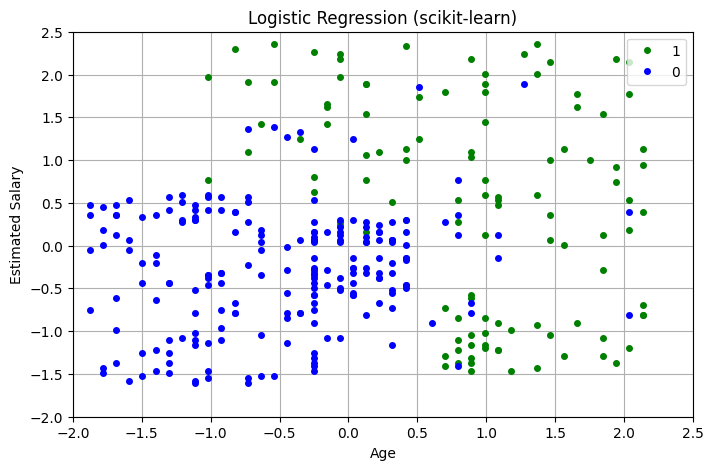

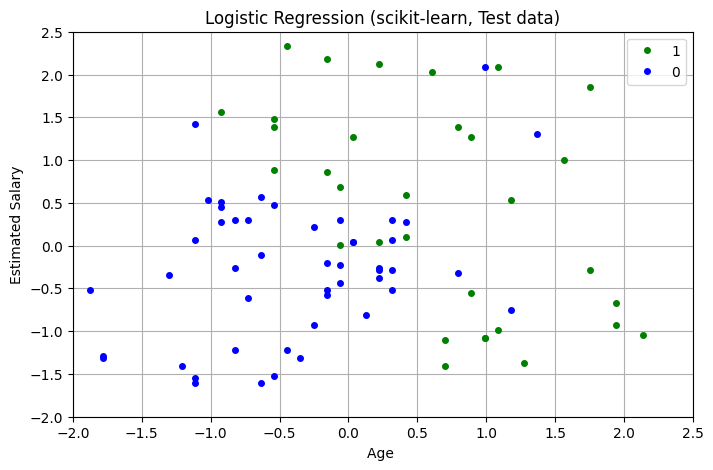

In [111]:
# 7. scikit-learn Library를 이용, 모델 학습하고, 파라미터 값 출력 print(w0, w1, w2)

X_data = data[["Age", "EstimatedSalary"]].values
y = data["Purchased"].values.reshape(-1, 1)

X_mean = np.mean(X_data, axis=0)
X_std = np.std(X_data, axis=0)
X_norm = (X_data - X_mean) / X_std

X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

# scikit-learn 로지스틱 회귀
clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train.ravel())

# 파라미터 값
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print(w0, w1, w2)

# 8. 모델의 시각화

X2 = X_train[y_train.ravel() == 1]
X1 = X_train[y_train.ravel() == 0]
X2_test = X_test[y_test.ravel() == 1]
X1_test = X_test[y_test.ravel() == 0]

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(X2[:, 0], X2[:, 1], 'go', markersize=4, label='1')
plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize=4, label='0')
plt.title('Logistic Regression (scikit-learn)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc=1)
plt.grid()
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.show()

# 테스트 데이터 시각화
plt.figure(figsize=(8, 5))
plt.plot(X2_test[:, 0], X2_test[:, 1], 'go', markersize=4, label='1')
plt.plot(X1_test[:, 0], X1_test[:, 1], 'bo', markersize=4, label='0')
plt.title('Logistic Regression (scikit-learn, Test data)')
plt.xlabel('Age ')
plt.ylabel('Estimated Salary')
plt.legend(loc=1)
plt.grid()
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.show()

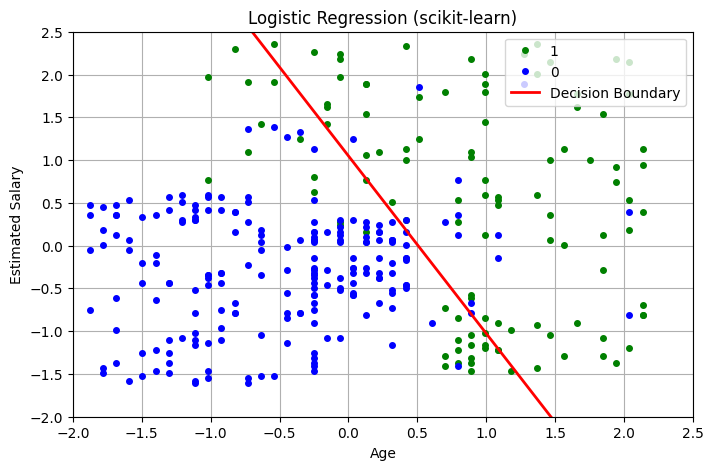

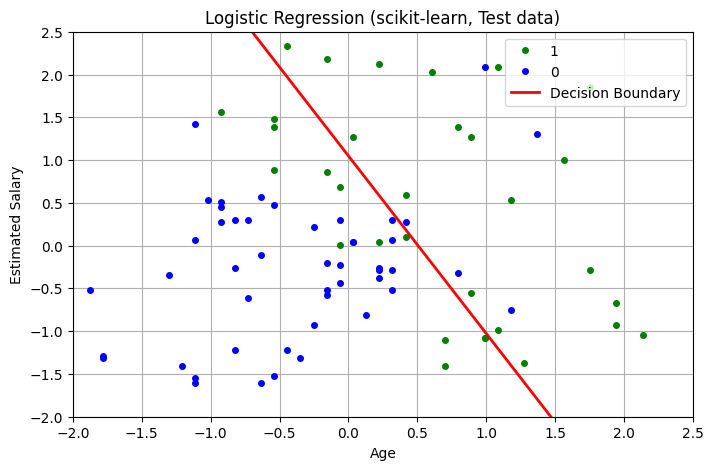

In [112]:
# 8. 모델의 시각화 + 경계선

X2 = X_train[y_train.ravel() == 1]
X1 = X_train[y_train.ravel() == 0]
X2_test = X_test[y_test.ravel() == 1]
X1_test = X_test[y_test.ravel() == 0]

# 경계선 계산
xp = np.linspace(-2, 2.5, 100).reshape(-1, 1)
yp = -w1 / w2 * xp - w0 / w2

# 학습 데이터 시각화 + 경계선
plt.figure(figsize=(8, 5))
plt.plot(X2[:, 0], X2[:, 1], 'go', markersize=4, label='1')
plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize=4, label='0')
plt.plot(xp, yp, 'r', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression (scikit-learn)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc=1)
plt.grid()
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.show()

# 테스트 데이터 시각화 + 경계선
plt.figure(figsize=(8, 5))
plt.plot(X2_test[:, 0], X2_test[:, 1], 'go', markersize=4, label='1')
plt.plot(X1_test[:, 0], X1_test[:, 1], 'bo', markersize=4, label='0')
plt.plot(xp, yp, 'r', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression (scikit-learn, Test data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc=1)
plt.grid()
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.show()